In [16]:
import os

import pandas as pd
import numpy as np
import scipy as sp

import matplotlib.pyplot as plt
import seaborn as sns

np.random.seed(42)

# Question 3

In [5]:
def load_data(fpath: str | os.PathLike = "../../data/01_raw/penguins.csv"
              ) -> pd.DataFrame:
    return pd.read_csv(fpath)

df = load_data()
df

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181,3750,MALE
1,Adelie,Torgersen,39.5,17.4,186,3800,FEMALE
2,Adelie,Torgersen,40.3,18.0,195,3250,FEMALE
3,Adelie,Torgersen,36.7,19.3,193,3450,FEMALE
4,Adelie,Torgersen,39.3,20.6,190,3650,MALE
...,...,...,...,...,...,...,...
337,Gentoo,Biscoe,47.2,13.7,214,4925,FEMALE
338,Gentoo,Biscoe,46.8,14.3,215,4850,FEMALE
339,Gentoo,Biscoe,50.4,15.7,222,5750,MALE
340,Gentoo,Biscoe,45.2,14.8,212,5200,FEMALE


In [28]:
our_penguin = "Gentoo"
gentoo = df[df['species'] == our_penguin]

## 3.2

In [31]:
class PenguinModel():

    def __init__(self):
        self.alpha_prior = None
        self.beta_prior = None
        self.sigma_prior = None
        self.likelihood = None

    def build_priors(self):
        self.assign_alpha_prior()
        self.assign_beta_prior()
        self.assign_sigma_prior()

    # define model attributes
    def assign_alpha_prior(self, loc: float=3.0, scale: float=2.0):
        mod = sp.stats.norm(loc=loc, scale=scale)
        self.alpha_prior = mod

    def assign_beta_prior(self, loc: float=0.1, scale: float=0.2):
        mod = sp.stats.norm(loc=loc, scale=scale)
        self.beta_prior = mod

    def assign_sigma_prior(self, s: float=400, scale: float=0):
        mod = sp.stats.lognorm(s=s, scale=np.exp(scale))
        self.sigma_prior = mod

    def assign_likelihood(self, loc, scale):
        mod = sp.stats.norm(loc=loc, scale=scale)
        self.likelihood = mod

    # define methods
    def simulate_prior_predictive(self, X, n_posterior_samples):
        n_prior_samples = len(X)

        alpha = self.alpha_prior.rvs(size=n_prior_samples)
        beta = self.beta_prior.rvs(size=n_prior_samples)
        sigma = self.sigma_prior.rvs(size=n_prior_samples)
        mu = alpha + beta * X

        self.assign_likelihood(loc=mu, scale=sigma)
        y_tilde = self.likelihood.rvs(size=n_posterior_samples)
        
        return y_tilde

In [35]:
n_posterior_samples = len(gentoo['flipper_length_mm'])

In [37]:
model = PenguinModel()
model.build_priors()
prior_predict = model.simulate_prior_predictive(gentoo['flipper_length_mm'], n_posterior_samples)

/Users/tony/miniforge3/envs/uvmbayes/lib/python3.12/site-packages/scipy/stats/_continuous_distns.py:6550: RuntimeWarning: overflow encountered in exp
  return np.exp(s * random_state.standard_normal(size))


(array([116.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   1.]),
 array([-9.62921848e+299,  3.86041175e+306,  7.72082446e+306,
         1.15812372e+307,  1.54416499e+307,  1.93020626e+307,
         2.31624753e+307,  2.70228880e+307,  3.08833007e+307,
         3.47437134e+307,  3.86041261e+307,  4.24645388e+307,
         4.63249516e+307,  5.01853643e+307,  5.40457770e+307,
         5.79061897e+307,  6.17666024e+307,  6.56270151e+307,
         6.94874278e+307,  7.33478405e+307,  7.72082532e+307,
         8.10686660e+307,  8.49290787e+307,  8.87894914e+307,
         9.26499041e+307,  9.65103168e+307]),
 <BarContainer object of 25 artists>)

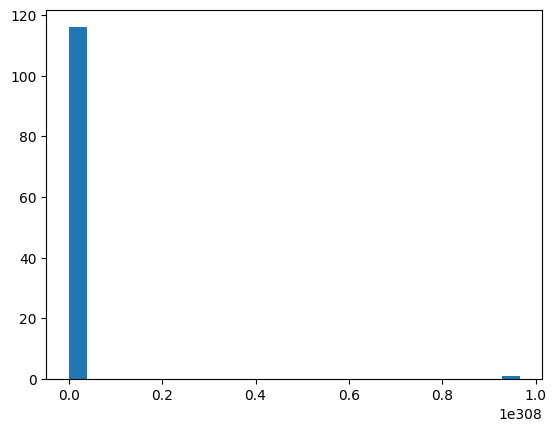

In [46]:
plt.hist(prior_predict[~np.isinf(prior_predict)], bins=25)